<img src="image/Capa.png" alt="ebac-logo">

---

# **Brescia** | Python: DataSet Global Peace Index 2023 

Caderno de **Códigos**<br> 
Desenvolvedor [Enzo Schitini](https://enzo-schitini.bubbleapps.io/version-test/)

---

## -> `Definição`

### `Sobre a função do programa`

Olá, meu nome é `Enzo Schtini` e quero compartilhar `Imola` com você. É um algoritmo que revela dados incríveis sobre ‘exoplanetas e a temperatura das estrelas’.

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from functools import reduce

from adige import valore_abbreviato
from adige import ArquivoCSV

index_csv = './index.csv'

### `1° Análise exploratória`

##### Contexto

...

| Coluna  | Descrição |
| ------- | --------- |
| Country      | Nome do pais |
| iso3c | Nome abreviado |
| year   | --- |
| Overall Scores    | Pontuação geral |
| Safety and Security | Segurança e proteção |
| Ongoing Conflict | Conflito contínuo |
| Militarian | Militar |

In [24]:
df = pd.read_csv(index_csv, na_values='na')

struttura = df.shape
struttura = str(struttura).replace('(', '').replace(')', '')
struttura = str(struttura).strip().split(sep=',')
print(f'Data information: {valore_abbreviato(struttura[0])} lines and {valore_abbreviato(struttura[1])} columns.')

Data information: 2.578 lines and 13 columns.


In [25]:
df.dtypes

Country                 object
iso3c                   object
year                     int64
Overall Scores         float64
Safety and Security    float64
Ongoing Conflict       float64
MilitarianBelarus      float64
BLR                    float64
2008                   float64
2.139                  float64
2.582                  float64
1.805                  float64
1.84                   float64
dtype: object

- Atributos **categóricos**.

In [26]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
Country,2578,163,Bolivia,16
iso3c,2578,163,BOL,16


- Atributos **numéricos**.

In [27]:
df.drop('Country', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,2578.0,2015.574088,4.580770,2008.000,2012.00000,2016.0000,2020.000,2023.000
Overall Scores,2578.0,2.018536,0.443702,1.081,1.72900,1.9750,2.232,3.588
Safety and Security,2578.0,2.345314,0.566768,1.178,2.00800,2.3580,2.676,4.177
Ongoing Conflict,2578.0,1.714928,0.568449,1.000,1.40300,1.6040,2.006,3.828
MilitarianBelarus,2578.0,1.892369,0.406729,1.012,1.64425,1.8335,2.078,4.108
BLR,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.139,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.582,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.805,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Dados ausentes

In [28]:
df.isna().any()

Country                False
iso3c                  False
year                   False
Overall Scores         False
Safety and Security    False
Ongoing Conflict       False
MilitarianBelarus      False
BLR                     True
2008                    True
2.139                   True
2.582                   True
1.805                   True
1.84                    True
dtype: bool

- A função abaixo gera algumas estatísticas sobre as colunas de dados ausentes.

In [29]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantity': qtd, "percentage": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [30]:
stats_dados_faltantes(df=df)

{'BLR': {'quantity': 2578, 'percentage': 100.0}}
{'2008': {'quantity': 2578, 'percentage': 100.0}}
{'2.139': {'quantity': 2578, 'percentage': 100.0}}
{'2.582': {'quantity': 2578, 'percentage': 100.0}}
{'1.805': {'quantity': 2578, 'percentage': 100.0}}
{'1.84': {'quantity': 2578, 'percentage': 100.0}}


### `2° Limpeza de dados`

In [31]:
from adige import ArquivoCSV
csv = ArquivoCSV('./index.csv')
csv = csv.extrair_coluna(0)
print(f'Numero iniziale: {len(csv)}')

def pulizia(archivio):
    file = []
    with open(file=archivio, mode='r', encoding='utf-8') as fp:
        line = fp.readline()
        line = fp.readline()
        while line:
            line_sep = line.split(sep=',')
            if line_sep[3] != '':
                file.append(line)
                line = fp.readline()
            else:
                line = fp.readline()
    from adige import limp_csv
    limp_csv(archivio)

    with open(file=archivio, mode='a', encoding='utf-8') as fp:
        fp.write('Country,iso3c,year,Overall Scores,Safety and Security,Ongoing Conflict,Militarian')
        for x in file:
            fp.write(x)

pulizia('./index.csv')
csv = ArquivoCSV('./index.csv')
csv = csv.extrair_coluna(0)
print(f'Numero finale: {len(csv)}')

Numero iniziale: 2578
Numero finale: 2577


### `3° Visualização de dados`

In [32]:
def cattegorie(file, colonna:int):
    csv = ArquivoCSV(file)
    lista = list(set(csv.extrair_coluna(colonna)))
    return list(filter(None, lista))

In [33]:
print(f'I dati vanno dal {min(cattegorie(index_csv, 2))} fino a {max(cattegorie(index_csv, 2))}, tutto sommato: {len(cattegorie(index_csv, 2))} anni di analise.')

I dati vanno dal 2008 fino a 2023, tutto sommato: 16 anni di analise.


##### Dados dos país

In [34]:
paese_nome = 'Italy'

In [35]:
def trovare_paese(paese:str) -> list:
    paesi = []
    with open(file=index_csv, mode='r', encoding='utf-8') as fp:
        line = fp.readline()
        line = fp.readline()
        while line:
            line = line.strip()
            line_x = line.split(sep=',')
            if line_x[0] == paese:
                paesi.append(line)
                line = fp.readline()
            else:
                line = fp.readline()
    return paesi

print(trovare_paese(paese_nome))
print(len(trovare_paese(paese_nome)))
trovare_paese(paese_nome)[0]

['Italy,ITA,2008,1.588,1.752,1.073,2.041', 'Italy,ITA,2009,1.673,1.948,1.08,2.033', 'Italy,ITA,2010,1.636,1.852,1.083,2.045', 'Italy,ITA,2011,1.655,1.932,1.073,1.996', 'Italy,ITA,2012,1.677,1.961,1.057,2.059', 'Italy,ITA,2013,1.703,2.028,1.057,2.045', 'Italy,ITA,2014,1.667,1.954,1.057,2.031', 'Italy,ITA,2015,1.668,2.014,1.062,1.919', 'Italy,ITA,2016,1.662,1.994,1.067,1.924', 'Italy,ITA,2017,1.649,1.973,1.064,1.913', 'Italy,ITA,2018,1.701,2.095,1.057,1.922', 'Italy,ITA,2019,1.676,2.018,1.055,1.96', 'Italy,ITA,2020,1.63,1.945,1.048,1.909', 'Italy,ITA,2021,1.65,1.969,1.041,1.957', 'Italy,ITA,2022,1.642,1.924,1.041,2.003', 'Italy,ITA,2023,1.662,1.93,1.046,2.07']
16


'Italy,ITA,2008,1.588,1.752,1.073,2.041'

In [36]:
def calcoli_paese(paesi:list):

    overall_scores = []
    safety_security = []
    ongoing_conflict = []
    militarian = []

    for x in paesi:
        x = str(x)
        x_sep = x.split(sep=',')
        overall_scores.append((x_sep)[3])
        safety_security.append((x_sep)[4])
        ongoing_conflict.append((x_sep)[5])
        militarian.append((x_sep)[6])
    
    return overall_scores, safety_security, ongoing_conflict, militarian

overall_scores = calcoli_paese(trovare_paese(paese_nome))[0]
print(overall_scores)

['1.588', '1.673', '1.636', '1.655', '1.677', '1.703', '1.667', '1.668', '1.662', '1.649', '1.701', '1.676', '1.63', '1.65', '1.642', '1.662']


In [37]:
def informazioni_paese(paese:str):
    # Gli anni
    anni = list(map(int, cattegorie(index_csv, 2)))
    anni.sort()
    print(anni) 
    # Dati prelevati
    overall_scores = list(map(float, calcoli_paese(trovare_paese(paese))[0]))
    safety_security = list(map(float, calcoli_paese(trovare_paese(paese))[1]))
    ongoing_conflict = list(map(float, calcoli_paese(trovare_paese(paese))[2]))
    militarian = list(map(float, calcoli_paese(trovare_paese(paese))[3]))
    print(overall_scores)
    # Le medie
    overall_scores_media = round(reduce(lambda x, y: x + y, overall_scores) / len(anni), 2)
    safety_security_media = round(reduce(lambda x, y: x + y, safety_security) / len(anni), 2)
    ongoing_conflict_media = round(reduce(lambda x, y: x + y, ongoing_conflict) / len(anni), 2)
    militarian_media = round(reduce(lambda x, y: x + y, militarian) / len(anni), 2)
    medie = [paese, overall_scores_media, safety_security_media, ongoing_conflict_media, militarian_media]
    print(f'Le medie di {paese} sono: \nPontuação geral: {overall_scores_media} \nSegurança e proteção: {safety_security_media} \nConflito contínuo: {ongoing_conflict_media}  \nMilitar: {militarian_media}.')

    return medie

informazioni_paese('Italy')

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
[1.588, 1.673, 1.636, 1.655, 1.677, 1.703, 1.667, 1.668, 1.662, 1.649, 1.701, 1.676, 1.63, 1.65, 1.642, 1.662]
Le medie di Italy sono: 
Pontuação geral: 1.66 
Segurança e proteção: 1.96 
Conflito contínuo: 1.06  
Militar: 1.99.


['Italy', 1.66, 1.96, 1.06, 1.99]

In [38]:
data = trovare_paese(paese_nome)
data.sort(key=lambda x: float(x.split(',')[2]), reverse=True)

ordem = 0
print('------------------------------------------')
for x in data:
    x = x.strip().split(sep=',')
    ordem = ordem + 1
    print(f'{ordem}° {x[0]} - {x[2]}  --> Overall Scores {x[3]}')
    print('------------------------------------------')

------------------------------------------
1° Italy - 2023  --> Overall Scores 1.662
------------------------------------------
2° Italy - 2022  --> Overall Scores 1.642
------------------------------------------
3° Italy - 2021  --> Overall Scores 1.65
------------------------------------------
4° Italy - 2020  --> Overall Scores 1.63
------------------------------------------
5° Italy - 2019  --> Overall Scores 1.676
------------------------------------------
6° Italy - 2018  --> Overall Scores 1.701
------------------------------------------
7° Italy - 2017  --> Overall Scores 1.649
------------------------------------------
8° Italy - 2016  --> Overall Scores 1.662
------------------------------------------
9° Italy - 2015  --> Overall Scores 1.668
------------------------------------------
10° Italy - 2014  --> Overall Scores 1.667
------------------------------------------
11° Italy - 2013  --> Overall Scores 1.703
------------------------------------------
12° Italy - 2012  --> 

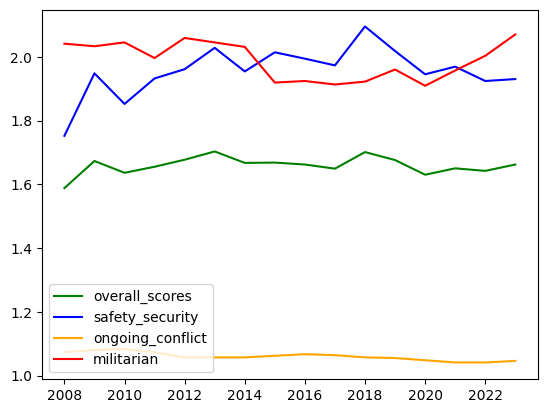

In [39]:
def creando_grafico_paese(paese:str, nome_grafico:str):
    anni = list(map(int, cattegorie(index_csv, 2)))
    anni.sort()

    overall_scores = list(map(float, calcoli_paese(trovare_paese(paese))[0]))
    safety_security = list(map(float, calcoli_paese(trovare_paese(paese))[1]))
    ongoing_conflict = list(map(float, calcoli_paese(trovare_paese(paese))[2]))
    militarian = list(map(float, calcoli_paese(trovare_paese(paese))[3]))

    x  = anni
    y1 = overall_scores
    y2 = safety_security
    y3 = ongoing_conflict
    y4 = militarian

    #plt.title(f'Indice di pace globale 2023 in {paese}')
    plt.plot(x, y1, color = "green", label="overall_scores")
    plt.plot(x, y2, color = "blue", label="safety_security")
    plt.plot(x, y3, color = "orange", label="ongoing_conflict")
    plt.plot(x, y4, color = "red", label="militarian")
    #plt.xlabel("Anni")
    #plt.ylabel("Punteggi")
    plt.savefig(nome_grafico)
    plt.legend()
    plt.show()

creando_grafico_paese(paese=paese_nome, nome_grafico=paese_nome)

##### Dados globais

In [40]:
def medie_paesi_periodo():
    paesi = cattegorie(index_csv, 0)
    print(paesi)
    tutti = []
    for x in paesi:
        tutti.append(informazioni_paese(paese=x))
    return tutti

In [41]:
def lista_string():
   tutti = medie_paesi_periodo()
   lista = []
   for x in tutti:
      x = [str(elemento) for elemento in x]
      stringa = '/ '.join(x)
      lista.append(stringa)
      #print(stringa)
   return lista

lista = lista_string()
print(lista)

['Chile', 'North Korea', 'Republic of the Congo', 'Timor-Leste', 'Pakistan', 'Serbia', 'Hungary', 'China', 'Austria', 'Russia', 'Tunisia', 'Dominican Republic', 'Ecuador', 'Guatemala', 'Mauritius', 'Brazil', 'Jordan', 'Trinidad and Tobago', 'Kenya', 'France', 'Haiti', 'Sierra Leone', 'Paraguay', 'Cuba', 'Slovenia', 'Eritrea', 'Colombia', 'Equatorial Guinea', 'Yemen', 'Australia', 'Uzbekistan', 'Croatia', 'Nigeria', 'Nicaragua', 'Ireland', 'Bulgaria', 'United States of America', 'Lesotho', 'El Salvador', 'Sweden', 'Kosovo', 'Turkiye', 'South Korea', 'Portugal', 'Djibouti', 'Estonia', 'Afghanistan', 'Romania', 'Sudan', 'Togo', 'Ukraine', 'Belgium', 'Bolivia', 'Panama', 'Burundi', 'Iceland', 'Myanmar', 'Denmark', 'Central African Republic', 'Gabon', 'Netherlands', 'Mauritania', 'India', 'Namibia', 'Costa Rica', 'Guinea', 'Azerbaijan', 'Liberia', 'Mali', 'Cameroon', 'Zimbabwe', 'Albania', 'Ghana', 'Kyrgyz Republic', 'Malaysia', 'Senegal', 'Nepal', 'Malawi', 'Mozambique', 'Palestine', 'Thai

In [42]:
# Gruppetto dei cinque

data = lista_string()
print(data)

# Ordina i dati in base alla temperatura (dal più alto al più basso)
data.sort(key=lambda x: float(x.split('/')[1]), reverse=False)

def ordinando(data:list):
   ordine = 0
   paesi_in_ordine = []
   print(' \n ')
   print('--------------------------')
   for x in data:
      ordine = ordine + 1
      add = x + '/ ' + str(ordine)
      x = x.strip().split(sep='/')
      print(f'{ordine}° {x[0]} --> Overall Scores {x[1]}')
      paesi_in_ordine.append(add)
   #print(paesi_in_ordine)
   print('--------------------------')
   return paesi_in_ordine

ordinando(data)

def smistando(data:list):

   tre_primi = []
   tre_ultimi = []

   tre_primi.append(data[3])
   tre_primi.append(data[4])
   tre_primi.append(data[5])
   tre_ultimi.append(data[-5])
   tre_ultimi.append(data[-6])
   tre_ultimi.append(data[-7])

   return tre_primi, tre_ultimi


paesi_in_ordine = ordinando(data)
print(smistando(paesi_in_ordine)[0])
print(smistando(paesi_in_ordine)[1])

['Chile', 'North Korea', 'Republic of the Congo', 'Timor-Leste', 'Pakistan', 'Serbia', 'Hungary', 'China', 'Austria', 'Russia', 'Tunisia', 'Dominican Republic', 'Ecuador', 'Guatemala', 'Mauritius', 'Brazil', 'Jordan', 'Trinidad and Tobago', 'Kenya', 'France', 'Haiti', 'Sierra Leone', 'Paraguay', 'Cuba', 'Slovenia', 'Eritrea', 'Colombia', 'Equatorial Guinea', 'Yemen', 'Australia', 'Uzbekistan', 'Croatia', 'Nigeria', 'Nicaragua', 'Ireland', 'Bulgaria', 'United States of America', 'Lesotho', 'El Salvador', 'Sweden', 'Kosovo', 'Turkiye', 'South Korea', 'Portugal', 'Djibouti', 'Estonia', 'Afghanistan', 'Romania', 'Sudan', 'Togo', 'Ukraine', 'Belgium', 'Bolivia', 'Panama', 'Burundi', 'Iceland', 'Myanmar', 'Denmark', 'Central African Republic', 'Gabon', 'Netherlands', 'Mauritania', 'India', 'Namibia', 'Costa Rica', 'Guinea', 'Azerbaijan', 'Liberia', 'Mali', 'Cameroon', 'Zimbabwe', 'Albania', 'Ghana', 'Kyrgyz Republic', 'Malaysia', 'Senegal', 'Nepal', 'Malawi', 'Mozambique', 'Palestine', 'Thai

In [43]:
def media_generale(cosa:int, lista):
   dati = lista
   data = []
   for i in dati:
      i_sep = i.split(sep='/')
      i = float(i_sep[cosa].strip())
      data.append(i)
   media = round(reduce(lambda x, y: x + y, data) / float(len(data)), 2)
   print(f'Valore maggiore: {max(data)} e minimo valore: {min(data)} -> Media: {media}')

print('Global')
print('Overall score:')
media_generale(1, data)
print('Security and protection')
media_generale(2, data)
print('Continuing conflict')
media_generale(3, data)
print('Military')
media_generale(4, data)

Global
Overall score:
Valore maggiore: 3.16 e minimo valore: 1.14 -> Media: 1.99
Security and protection
Valore maggiore: 3.82 e minimo valore: 1.24 -> Media: 2.32
Continuing conflict
Valore maggiore: 3.19 e minimo valore: 0.98 -> Media: 1.69
Military
Valore maggiore: 3.88 e minimo valore: 0.99 -> Media: 1.87


['Denmark/ 1.27/ 1.3/ 1.16/ 1.38/ 4', 'New Zealand/ 1.3/ 1.55/ 1.04/ 1.24/ 5', 'Slovenia/ 1.34/ 1.33/ 1.43/ 1.25/ 6']
['Sudan/ 2.98/ 3.27/ 3.1/ 2.37/ 159', 'Russia/ 2.97/ 3.12/ 2.59/ 3.27/ 158', 'Democratic Republic of the Congo/ 2.94/ 3.54/ 2.9/ 2.03/ 157']


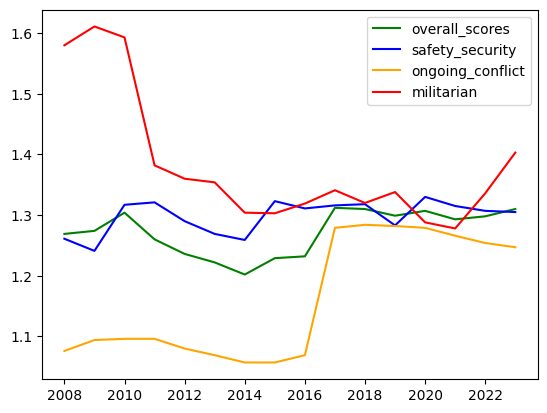

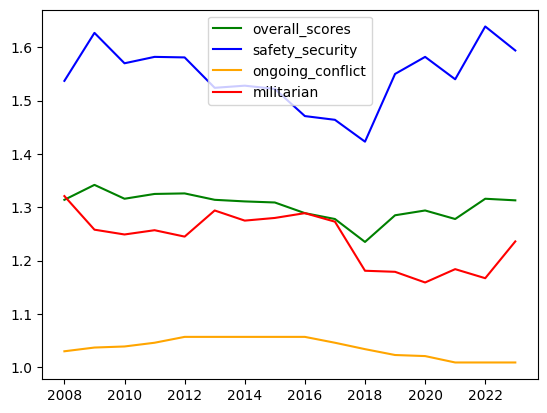

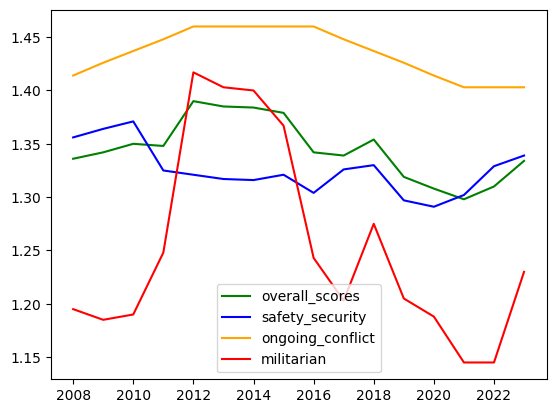

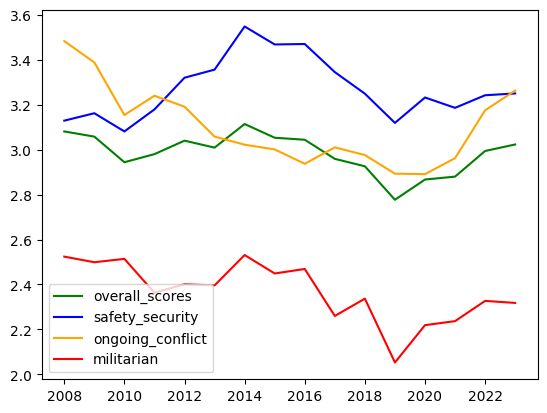

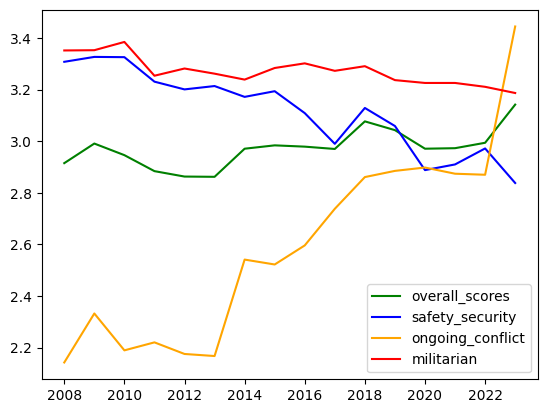

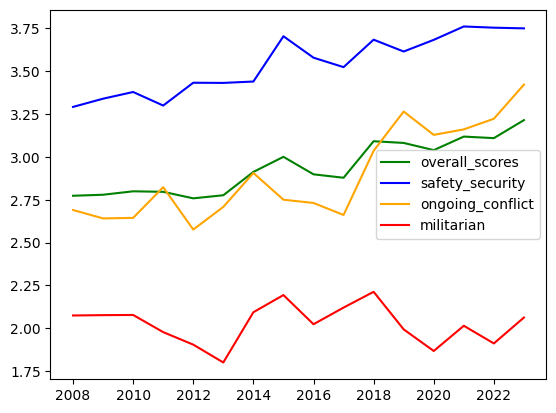

In [44]:
# Grafico dei tre primi e dei tre ultimi

#paesi_in_ordine = ordinando(data)

primi = smistando(paesi_in_ordine)[0]
ultimi = smistando(paesi_in_ordine)[1]
print(primi)
print(ultimi)

nomi = []

for x in primi:
    x_sep = x.split(sep=('/'))
    nomi.append(x_sep[0])
for x in ultimi:
    x_sep = x.split(sep=('/'))
    nomi.append(x_sep[0])

for i in nomi:
    #print(i)
    creando_grafico_paese(i, i)